In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r"C:\\Users\\M SWETHA\\Downloads\\Influencer.csv")
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [21]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [24]:
df.shape

(137, 10)

In [25]:
post = list(df['Posts'])
post1 = list()

for num in post:
    if 'k' in num:
        new_num = 1000 * float(num.replace('k', ''))
        post1.append(new_num)
    else:
        post1.append(float(num))

df['Posts'] = post1  # Correct the column name to 'Posts'


In [26]:
followers = list(df['Followers'])
followers_new = []

for num in followers:
    if 'k' in num:
        new_num = 1000 * float(num.replace('k', ''))
        followers_new.append(new_num)
    elif 'm' in num:
        new_num = 1000000 * float(num.replace('m', ''))
        followers_new.append(new_num)
    else:
        try:
            followers_new.append(float(num))
        except ValueError:
            # Handle other cases, such as '485.2m', in a way that makes sense for your data
            # For example, you might set it to NaN or another appropriate value
            followers_new.append(float('nan'))

df['Followers'] = followers_new


In [27]:
avg_likes = list(df['Avg. Likes'])
avg_likes_new = []

for num in avg_likes:
    if 'k' in num:
        new_num = 1000 * float(num.replace('k', ''))
        avg_likes_new.append(new_num)
    elif 'm' in num:
        new_num = 1000000 * float(num.replace('m', ''))
        avg_likes_new.append(new_num)
    else:
        try:
            avg_likes_new.append(float(num))
        except ValueError:
            # Handle other cases, such as '485.2m', in a way that makes sense for your data
            # For example, you might set it to NaN or another appropriate value
            avg_likes_new.append(float('nan'))

df['Avg. Likes'] = avg_likes_new


In [28]:
new_post_avg_likes = list(df['New Post Avg. Likes'])
new_post_avg_likes_new = []

for num in new_post_avg_likes:
    if 'k' in num:
        new_num = 1000 * float(num.replace('k', ''))
        new_post_avg_likes_new.append(new_num)
    elif 'm' in num:
        new_num = 1000000 * float(num.replace('m', ''))
        new_post_avg_likes_new.append(new_num)
    else:
        try:
            new_post_avg_likes_new.append(float(num))
        except ValueError:
            # Handle other cases, such as '485.2m', in a way that makes sense for your data
            # For example, you might set it to NaN or another appropriate value
            new_post_avg_likes_new.append(float('nan'))

df['New Post Avg. Likes'] = new_post_avg_likes_new


In [29]:
eng_rate_60_day = list(df['60-Day Eng Rate'])
eng_rate_60_day_new = []

for num in eng_rate_60_day:
    if isinstance(num, str) and 'k' in num:
        new_num = 1000 * float(num.replace('k', ''))
        eng_rate_60_day_new.append(new_num)
    elif isinstance(num, str) and 'm' in num:
        new_num = 1000000 * float(num.replace('m', ''))
        eng_rate_60_day_new.append(new_num)
    else:
        try:
            eng_rate_60_day_new.append(float(num))
        except (ValueError, TypeError):
            # Handle cases where the conversion to float is not possible
            # For example, you might set it to NaN or another appropriate value
            eng_rate_60_day_new.append(float('nan'))

df['60-Day Eng Rate'] = eng_rate_60_day_new


In [30]:
total_likes = list(df['Total Likes'])
total_likes_new = []

for num in total_likes:
    if isinstance(num, str) and 'k' in num:
        new_num = 1000 * float(num.replace('k', ''))
        total_likes_new.append(new_num)
    elif isinstance(num, str) and 'm' in num:
        new_num = 1000000 * float(num.replace('m', ''))
        total_likes_new.append(new_num)
    else:
        try:
            total_likes_new.append(float(num))
        except (ValueError, TypeError):
            # Handle cases where the conversion to float is not possible
            # For example, you might set it to NaN or another appropriate value
            total_likes_new.append(float('nan'))

df['Total Likes'] = total_likes_new


In [31]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,NaN,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,NaN,United States
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,NaN,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,NaN,United States
5,6,\narianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,NaN,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,NaN,Russia
196,197,\ndanbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,NaN,Canada
197,198,\nraisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,955900000.0,Indonesia
198,199,\nluansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,167200000.0,Brazil


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 137 non-null    int64  
 1   Channel Info         137 non-null    object 
 2   Influence Score      137 non-null    int64  
 3   Followers            137 non-null    float64
 4   Avg. Likes           137 non-null    float64
 5   Posts                137 non-null    float64
 6   60-Day Eng Rate      137 non-null    float64
 7   New Post Avg. Likes  137 non-null    float64
 8   Total Likes          28 non-null     float64
 9   Country Or Region    137 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 11.8+ KB


# Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated

In [33]:
correlation = df.corr()
correlation

ValueError: could not convert string to float: '\ncristiano'

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='PuRd')
plt.show()


NameError: name 'correlation' is not defined

<Figure size 1000x1000 with 0 Axes>

# What is the frequency distribution of the following features?

Influence Score
Followers
Posts

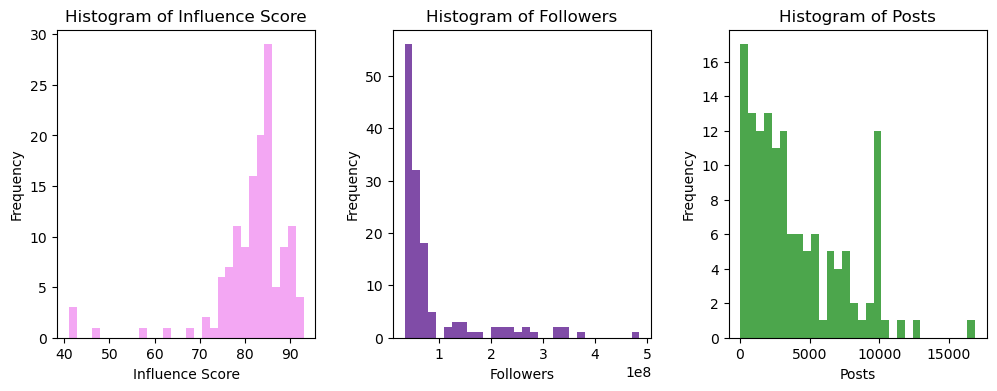

In [18]:
influence_score = df['Influence Score']
followers = df['Followers']
posts = df['Posts']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].hist(influence_score, bins=30, density=False, color='violet', alpha=0.7)
axs[0].set_title('Histogram of Influence Score')
axs[0].set_xlabel('Influence Score')
axs[0].set_ylabel('Frequency')

axs[1].hist(followers, bins=30, density=False, color='indigo', alpha=0.7)
axs[1].set_title('Histogram of Followers')
axs[1].set_xlabel('Followers')
axs[1].set_ylabel('Frequency')

axs[2].hist(posts, bins=30, density=False, color='green', alpha=0.7)
axs[2].set_title('Histogram of Posts')
axs[2].set_xlabel('Posts')
axs[2].set_ylabel('Frequency')

plt.subplots_adjust(wspace=0.3)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


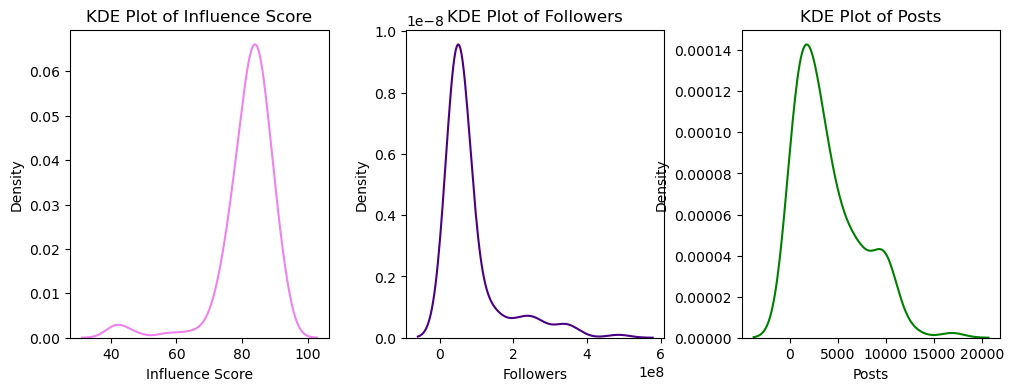

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.kdeplot(influence_score, color='violet', ax=axs[0])
axs[0].set_title('KDE Plot of Influence Score')

sns.kdeplot(followers, color='indigo', ax=axs[1])
axs[1].set_title('KDE Plot of Followers')

sns.kdeplot(posts, color='green', ax=axs[2])
axs[2].set_title('KDE Plot of Posts')

plt.subplots_adjust(wspace=0.3)
plt.show()


# Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

In [20]:
country_counts = df['Country Or Region'].value_counts().sort_values(ascending=False)

# Check if there are any missing values
if country_counts.isnull().any():
    print("There are missing values in the 'Country Or Region' column.")
else:
    highest_count_country = country_counts.index[0]
    print("The country with the highest number of Instagram influencers is:", highest_count_country)


The country with the highest number of Instagram influencers is: United States


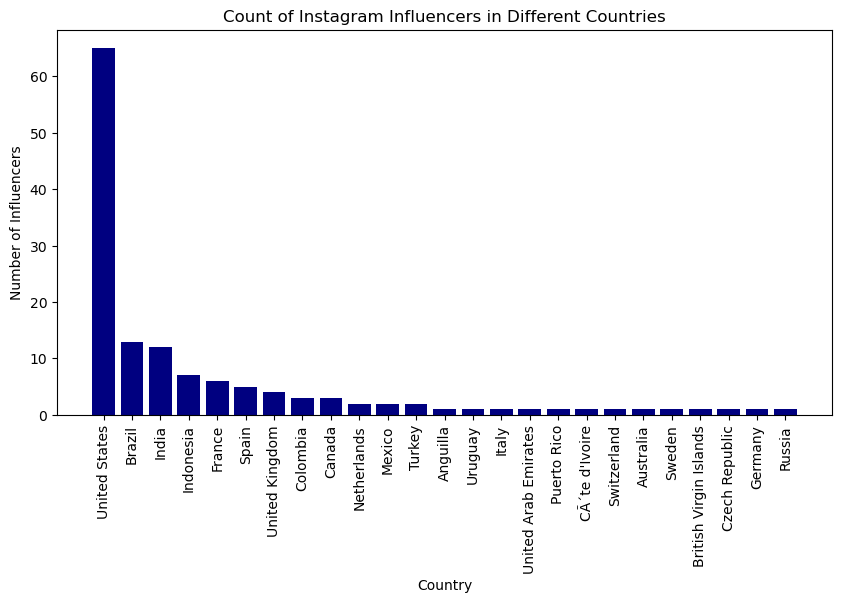

In [21]:
plt.figure(figsize=(10,5))
plt.bar(country_counts.index, country_counts.values, color='navy')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.title('Count of Instagram Influencers in Different Countries')
plt.show()

# Who are the top 10 influencers in the given dataset based on the following features

Followers
Average likes
Total Likes

In [22]:
top_followers = df.sort_values(by='Followers', ascending=False).head(10)


top_avg_likes = df.sort_values(by='Avg. Likes', ascending=False).head(10)


top_total_likes = df.sort_values(by='Total Likes', ascending=False).head(10)

In [23]:
print("Top 10 influencers based on Followers:\n", top_followers[['Channel Info', 'Followers']])

Top 10 influencers based on Followers:
          Channel Info    Followers
0         \ncristiano  485200000.0
1         kyliejenner  370700000.0
3       \nselenagomez  348800000.0
4           \ntherock  339400000.0
5      \narianagrande  333000000.0
6     \nkimkardashian  330700000.0
7           \nbeyonce  276100000.0
8   \nkhloekardashian  273900000.0
9      \njustinbieber  260000000.0
10    \nkendalljenner  258900000.0


In [24]:
print("\nTop 10 influencers based on Average Likes:\n", top_avg_likes[['Channel Info', 'Avg. Likes']])


Top 10 influencers based on Average Likes:
              Channel Info  Avg. Likes
0             \ncristiano   8700000.0
1             kyliejenner   8200000.0
3           \nselenagomez   6100000.0
22              \nzendaya   5900000.0
10        \nkendalljenner   5500000.0
118                \nzayn   4700000.0
100               \nadele   4700000.0
115         \nharrystyles   4700000.0
74     \nmilliebobbybrown   4100000.0
55   \nbts.bighitofficial   4100000.0


In [25]:
print("\nTop 10 influencers based on Total Likes:\n", top_total_likes[['Channel Info', 'Total Likes']])


Top 10 influencers based on Total Likes:
         Channel Info  Total Likes
132  \nhrithikroshan  958900000.0
197      \nraisa6690  955900000.0
170  \nantogriezmann  936600000.0
109   \nlouisvuitton  837100000.0
127          \nmaisa  829800000.0
118           \nzayn  783500000.0
183    \nbarackobama  758400000.0
126   \nnikefootball  756600000.0
171         \neminem  683000000.0
163             \nhm  637000000.0


# Describe the relationship between the following pairs of features using a suitable graph a) Followers and Total Likes b) Followers and Influence Score c) Posts and Average likes d) Posts and Influence Score

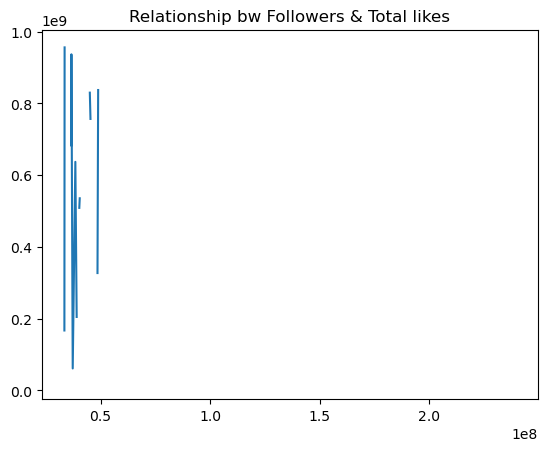

In [26]:
# Followers and Total Likes

plt.plot(df['Followers'],df['Total Likes'])
plt.title('Relationship bw Followers & Total likes')
plt.show()

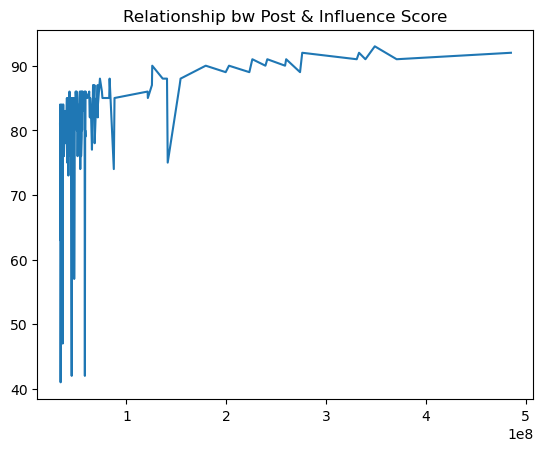

In [27]:
# Followers and Influence Score

plt.plot(df['Followers'],df['Influence Score'])
plt.title('Relationship bw Post & Influence Score')
plt.show()

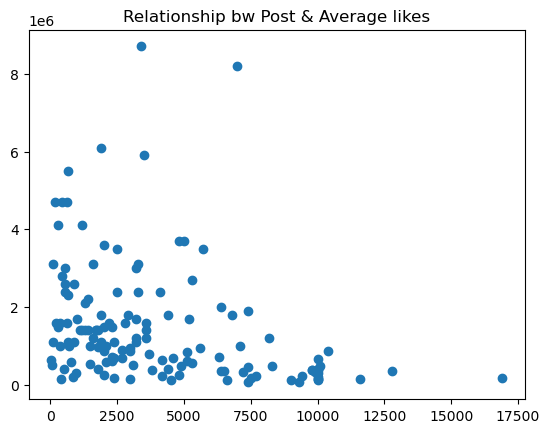

In [28]:
# Posts and Average likes

plt.scatter(df['Posts'], df['Avg. Likes'])
plt.title('Relationship bw Post & Average likes')
plt.show()

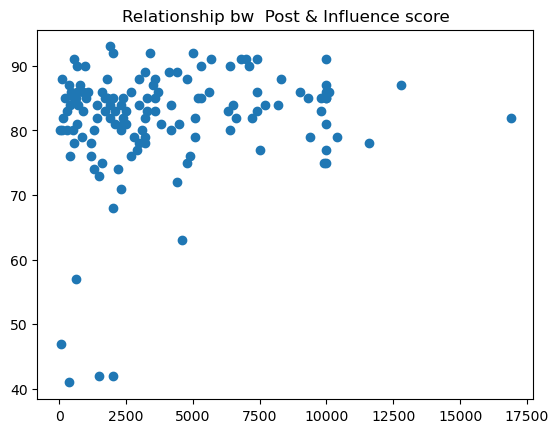

In [29]:
# Posts and Influence Score

plt.scatter(df['Posts'],df['Influence Score'])
plt.title('Relationship bw  Post & Influence score')
plt.show()

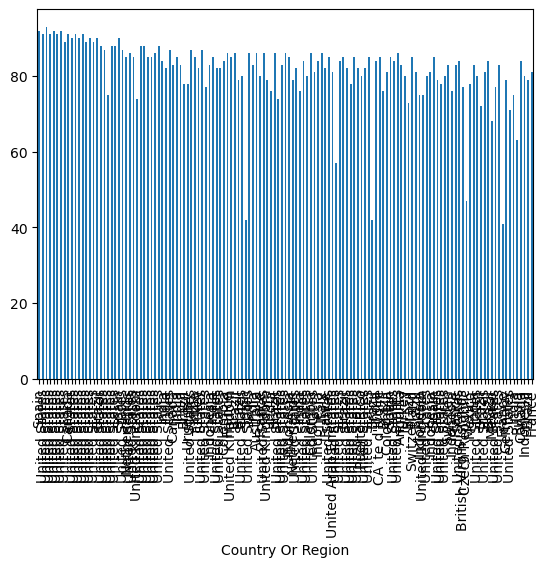

In [30]:
df.plot(x = "Country Or Region", y = "Influence Score", kind = "bar", legend = False)
plt.show()

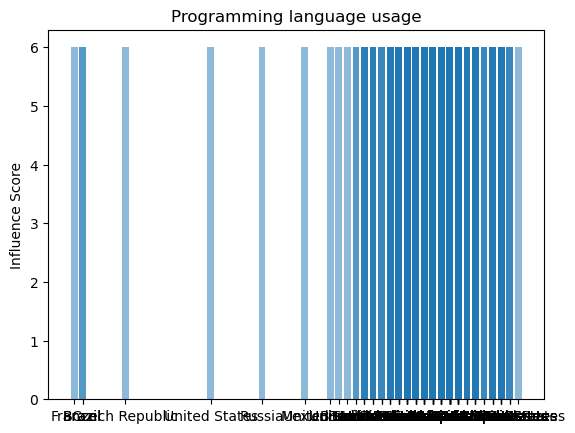

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = (df['Country Or Region'])
y_pos = df['Influence Score']

plt.bar(y_pos,height=6, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Influence Score')
plt.title('Programming language usage')

plt.show()

<Axes: xlabel='Country Or Region,Influence Score,Rank,Channel Info,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes'>

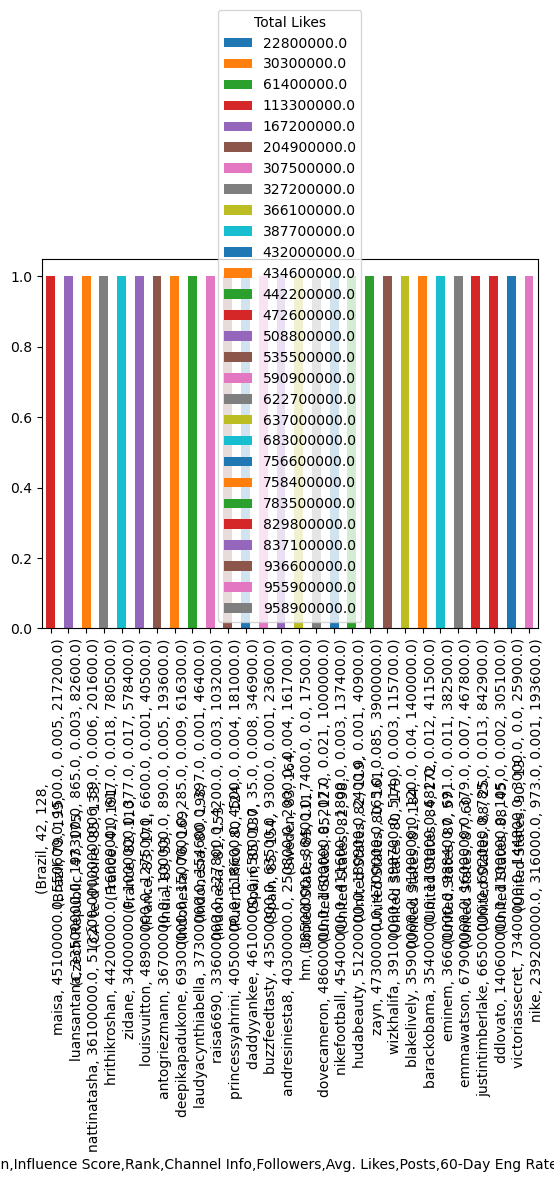

In [32]:
df.groupby(['Country Or Region','Influence Score']).value_counts().unstack().plot(kind='bar',stacked = True)